In [97]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import math

class Multiarm_Bandits():
    def __init__(self, k_arm=10, epsilon=0.1, stationary=False, sample_average=False, constant_step_size=False, alpha=0.1, q_initial_estimates=np.zeros(10), UCB=False, c=0.1):
        self.k_arm = k_arm
        self.t = 1
        self.stationary = stationary
        self.q_initial_estimates = q_initial_estimates
        self.q_estimated = self.q_initial_estimates
        if (not self.stationary):
            self.q_actual = np.random.normal() * np.ones(self.k_arm)
        else:
            self.q_actual = np.random.normal(size=k_arm)
        self.epsilon = epsilon
        self.sample_average = sample_average
        self.constant_step_size = constant_step_size 
        self.Nt = np.zeros(self.k_arm)
        self.alpha = alpha
        self.c = c
        self.UCB = UCB
        

    def explore_or_exploit(self, e):
        p = random.random()
        if (p < e):
            return "explore"
        else:
            return "exploit"

    def select_action(self):
        action_type = self.explore_or_exploit(self.epsilon)

        if (action_type == "exploit"):
            if (self.UCB):
                at = self.q_estimated + (self.c * np.sqrt(np.log(self.t) / (self.Nt + 0.01)))
            else:
                at = self.q_estimated
            At = np.argmax(at)
            return At

        else:
            At = np.random.randint(0, self.k_arm - 1)
            return At

    def take_action(self, action):
        self.t += 1
        self.Nt[action] += 1
        received_reward = np.random.normal(loc=self.q_actual[action], scale=1)  

        if (self.sample_average):
            self.q_estimated[action] = self.q_estimated[action] + ((received_reward - self.q_estimated[action]) / self.Nt[action])
        elif (self.constant_step_size):
            self.q_estimated[action] = self.q_estimated[action] + (self.alpha * (received_reward - self.q_estimated[action]))

        if (not self.stationary):
            self.q_actual = self.q_actual + np.random.normal(loc=0.0, scale=0.01, size=self.k_arm)

        return received_reward

    def check_action_optimality(self, action):	
        optimal = np.argmax(self.q_actual)
        if (action == optimal):
            return True
        else:
            return False

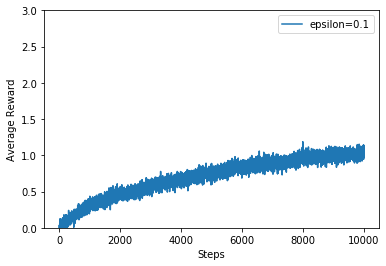

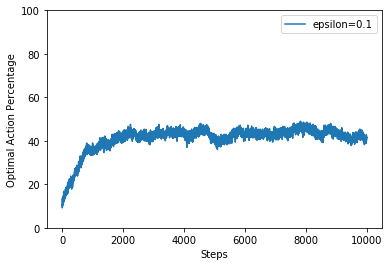

In [72]:
def q1_sample_avg(eps=[0.1], steps=10000, runs=500):

	rewards_for_plot = []
	optimal_action_for_plot = []
	
	for epsilon1 in eps:
		all_rewards = np.zeros((runs, steps))
		optimal_action_counter = np.zeros((runs, steps))
		for r in range(runs):
			bandit = Multiarm_Bandits(epsilon=epsilon1, sample_average=True)
			for i in range(steps):
				chosen_action = bandit.select_action()
				reward_obtained = bandit.take_action(chosen_action)
				all_rewards[r, i] = reward_obtained
				if (bandit.check_action_optimality(chosen_action)):
					optimal_action_counter[r, i] = 1

		reward_for_each_model = np.mean(all_rewards, axis=0)
		rewards_for_plot.append(reward_for_each_model)
		optimal_action_counter_for_each_model = np.mean(optimal_action_counter, axis=0)
		optimal_action_for_plot.append(optimal_action_counter_for_each_model * 100)

	names = ['epsilon=0.1']

	for i in range(len(rewards_for_plot)):
		plt.plot(rewards_for_plot[i], label=names[i])
	plt.xlabel('Steps')
	plt.ylabel('Average Reward')
	plt.ylim(0, 3)
	plt.legend()
	plt.show()
	#plt.savefig('./Results/q1_sample_avg_reward.png')
	plt.close()	

	for i in range(len(optimal_action_for_plot)):
		plt.plot(optimal_action_for_plot[i], label=names[i])
	plt.xlabel('Steps')
	plt.ylabel('Optimal Action Percentage')
	plt.ylim(0, 100)
	plt.legend()
	plt.show()
	#plt.savefig('./Results/q1_sample_avg_optimal_ac.png')
	plt.close()
    
q1_sample_avg()

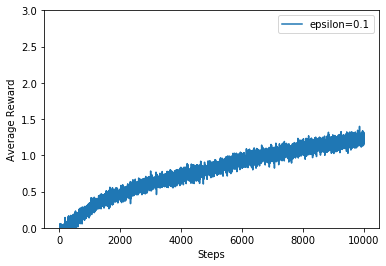

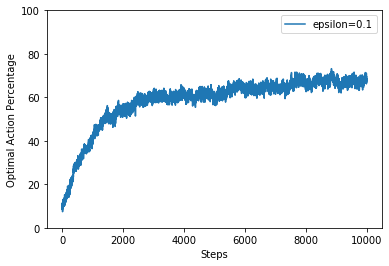

In [73]:
def q1_sample_constant_step(eps=[0.1], steps=10000, runs=500):

	rewards_for_plot = []
	optimal_action_for_plot = []
	
	for epsilon1 in eps:
		all_rewards = np.zeros((runs, steps))
		optimal_action_counter = np.zeros((runs, steps))
		for r in range(runs):
			bandit = Multiarm_Bandits(epsilon=epsilon1, constant_step_size=True)
			for i in range(steps):
				chosen_action = bandit.select_action()
				reward_obtained = bandit.take_action(chosen_action)
				all_rewards[r, i] = reward_obtained
				if (bandit.check_action_optimality(chosen_action)):
					optimal_action_counter[r, i] = 1

		reward_for_each_model = np.mean(all_rewards, axis=0)
		rewards_for_plot.append(reward_for_each_model)
		optimal_action_counter_for_each_model = np.mean(optimal_action_counter, axis=0)
		optimal_action_for_plot.append(optimal_action_counter_for_each_model * 100)

	names = ['epsilon=0.1']

	for i in range(len(rewards_for_plot)):
		plt.plot(rewards_for_plot[i], label=names[i])
	plt.xlabel('Steps')
	plt.ylabel('Average Reward')
	plt.ylim(0, 3)
	plt.legend()
	plt.show()
	plt.close()	

	for i in range(len(optimal_action_for_plot)):
		plt.plot(optimal_action_for_plot[i], label=names[i])
	plt.xlabel('Steps')
	plt.ylabel('Optimal Action Percentage')
	plt.ylim(0, 100)
	plt.legend()
	plt.show()
	plt.close()	

q1_sample_constant_step()

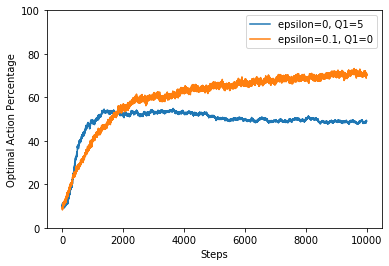

In [60]:
def q2_non_stationary(eps=[0, 0.1], steps=10000, runs=2000):

	optimal_action_for_plot = []
	
	for epsilon1 in eps:
		all_rewards = np.zeros((runs, steps))
		optimal_action_counter = np.zeros((runs, steps))
		for r in range(runs):
			if (epsilon1 == 0):
				bandit = Multiarm_Bandits(epsilon=epsilon1, q_initial_estimates=5*np.ones(10), constant_step_size=True)
			else:
				bandit = Multiarm_Bandits(epsilon=epsilon1, constant_step_size=True)
			for i in range(steps):
				chosen_action = bandit.select_action()
				reward_obtained = bandit.take_action(chosen_action)
				all_rewards[r, i] = reward_obtained
				if (bandit.check_action_optimality(chosen_action)):
					optimal_action_counter[r, i] = 1

		optimal_action_counter_for_each_model = np.mean(optimal_action_counter, axis=0)
		optimal_action_for_plot.append(optimal_action_counter_for_each_model * 100)

	names = ['epsilon=0, Q1=5', 'epsilon=0.1, Q1=0']
	for i in range(len(optimal_action_for_plot)):
		plt.plot(optimal_action_for_plot[i], label=names[i])
	plt.xlabel('Steps')
	plt.ylabel('Optimal Action Percentage')
	plt.ylim(0, 100)    
	plt.legend()
	plt.show()
	plt.close()	

q2_non_stationary()

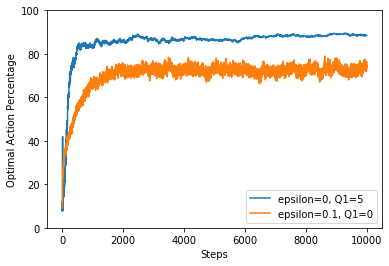

In [99]:
def q2_stationary(eps=[0, 0.1], steps=10000, runs=500):

	optimal_action_for_plot = []
	
	for epsilon1 in eps:
		all_rewards = np.zeros((runs, steps))
		optimal_action_counter = np.zeros((runs, steps))
		for r in range(runs):
			if (epsilon1 == 0):
				bandit = Multiarm_Bandits(epsilon=epsilon1, q_initial_estimates=5*np.ones(10), constant_step_size=True, stationary=True)
			else:
				bandit = Multiarm_Bandits(epsilon=epsilon1, constant_step_size=True, stationary=True)
			for i in range(steps):
				chosen_action = bandit.select_action()
				reward_obtained = bandit.take_action(chosen_action)
				all_rewards[r, i] = reward_obtained
				if (bandit.check_action_optimality(chosen_action)):
					optimal_action_counter[r, i] += 1

		optimal_action_counter_for_each_model = np.mean(optimal_action_counter, axis=0)
		optimal_action_for_plot.append(optimal_action_counter_for_each_model * 100)

	names = ['epsilon=0, Q1=5', 'epsilon=0.1, Q1=0']
	for i in range(len(optimal_action_for_plot)):
		plt.plot(optimal_action_for_plot[i], label=names[i])
	plt.xlabel('Steps')
	plt.ylabel('Optimal Action Percentage')
	plt.ylim(0, 100)
	plt.legend()
	plt.show()
	plt.close()	
    
q2_stationary()

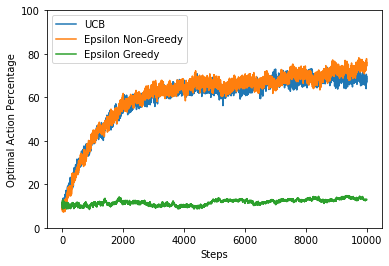

In [93]:
def q4_non_stationary(steps=10000, runs=500):
    
	all_rewards = np.zeros((runs, steps))
	optimal_action_counter = np.zeros((runs, steps))
	for r in range(runs):
		bandit = Multiarm_Bandits(epsilon=0.1, constant_step_size=True, UCB=True)
		for i in range(steps):
			chosen_action = bandit.select_action()
			reward_obtained = bandit.take_action(chosen_action)
			all_rewards[r, i] = reward_obtained
			if (bandit.check_action_optimality(chosen_action)):
				optimal_action_counter[r, i] += 1

	optimal_action_counter_for_each_model = np.mean(optimal_action_counter, axis=0)
	plt.plot(optimal_action_counter_for_each_model*100.0, label='UCB')
			
	all_rewards = np.zeros((runs, steps))
	optimal_action_counter = np.zeros((runs, steps))
	for r in range(runs):
		bandit = Multiarm_Bandits(epsilon=0.1, constant_step_size=True)
		for i in range(steps):
			chosen_action = bandit.select_action()
			reward_obtained = bandit.take_action(chosen_action)
			all_rewards[r, i] = reward_obtained
			if (bandit.check_action_optimality(chosen_action)):
				optimal_action_counter[r, i] += 1

	optimal_action_counter_for_each_model = np.mean(optimal_action_counter, axis=0)
	plt.plot(optimal_action_counter_for_each_model*100.0, label='Epsilon Non-Greedy')

			
        
	all_rewards = np.zeros((runs, steps))
	optimal_action_counter = np.zeros((runs, steps))
	for r in range(runs):
		bandit = Multiarm_Bandits(epsilon=0, constant_step_size=True)
		for i in range(steps):
			chosen_action = bandit.select_action()
			reward_obtained = bandit.take_action(chosen_action)
			all_rewards[r, i] = reward_obtained
			if (bandit.check_action_optimality(chosen_action)):
				optimal_action_counter[r, i] += 1

	optimal_action_counter_for_each_model = np.mean(optimal_action_counter, axis=0)
	plt.plot(optimal_action_counter_for_each_model*100.0, label='Epsilon Greedy')
    
	plt.xlabel('Steps')
	plt.ylabel('Optimal Action Percentage')
	plt.ylim(0, 100)
	plt.legend()
	plt.show()
	plt.close()	
    
q4_non_stationary()

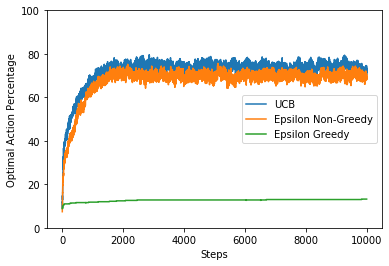

In [100]:
def q4_stationary(steps=10000, runs=500):
    all_rewards = np.zeros((runs, steps))
    optimal_action_counter = np.zeros((runs, steps))
    for r in range(runs):
        bandit = Multiarm_Bandits(epsilon=0.1, UCB=True, stationary=True, constant_step_size=True)
        for i in range(steps):
            chosen_action = bandit.select_action()
            reward_obtained = bandit.take_action(chosen_action)
            all_rewards[r, i] = reward_obtained
            if (bandit.check_action_optimality(chosen_action)):
                optimal_action_counter[r, i] += 1

    optimal_action_counter_for_each_model = np.mean(optimal_action_counter, axis=0)
    plt.plot(optimal_action_counter_for_each_model*100.0, label='UCB')

    all_rewards = np.zeros((runs, steps))
    optimal_action_counter = np.zeros((runs, steps))
    for r in range(runs):
        bandit = Multiarm_Bandits(epsilon=0.1, stationary=True, constant_step_size=True)
        for i in range(steps):
            chosen_action = bandit.select_action()
            reward_obtained = bandit.take_action(chosen_action)
            all_rewards[r, i] = reward_obtained
            if (bandit.check_action_optimality(chosen_action)):
                optimal_action_counter[r, i] += 1

    optimal_action_counter_for_each_model = np.mean(optimal_action_counter, axis=0)
    plt.plot(optimal_action_counter_for_each_model*100.0, label='Epsilon Non-Greedy')

    all_rewards = np.zeros((runs, steps))
    optimal_action_counter = np.zeros((runs, steps))
    for r in range(runs):
        bandit = Multiarm_Bandits(epsilon=0, stationary=True, constant_step_size=True)
        for i in range(steps):
            chosen_action = bandit.select_action()
            reward_obtained = bandit.take_action(chosen_action)
            all_rewards[r, i] = reward_obtained
            if (bandit.check_action_optimality(chosen_action)):
                optimal_action_counter[r, i] += 1

    optimal_action_counter_for_each_model = np.mean(optimal_action_counter, axis=0)
    plt.plot(optimal_action_counter_for_each_model*100.0, label='Epsilon Greedy')

    plt.xlabel('Steps')
    plt.ylabel('Optimal Action Percentage')
    plt.ylim(0, 100)
    plt.legend()
    plt.show()
    plt.close()	
    
q4_stationary()